DEVANG DHANDHUKIYA

Idea: Exploratory Data Analysis (EDA) on Retail Sales Data


Description:

In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats


In [29]:
df=pd.read_csv('retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [30]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


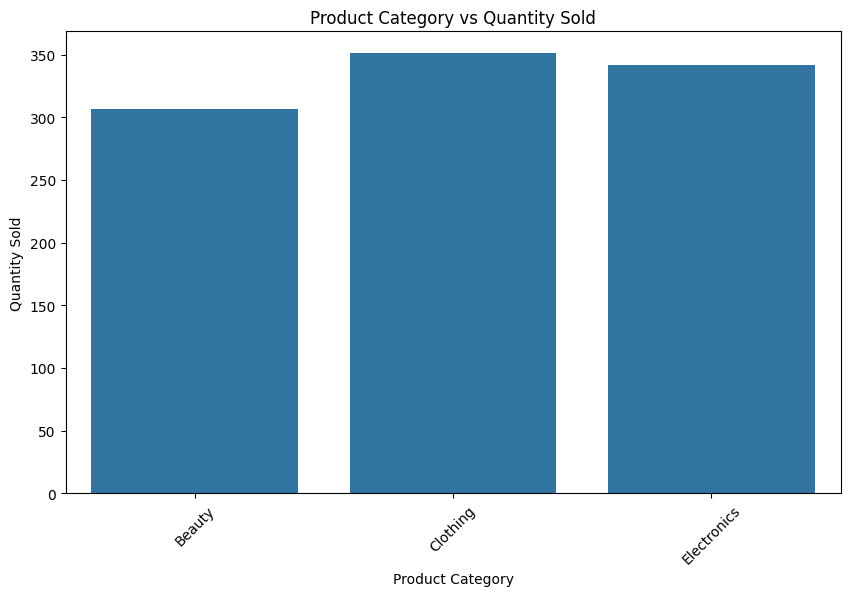

In [32]:
#comparing product category with quantity of category product sold and total amount of product sold
plt.figure(figsize=(10,6))
sns.countplot(x='Product Category',data=df)
plt.title('Product Category vs Quantity Sold')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()
#show count on each bar


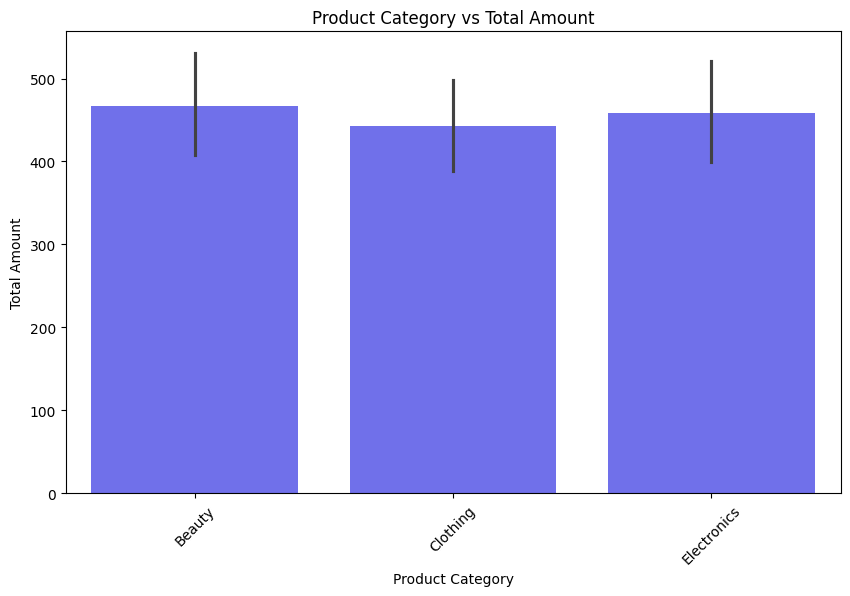

In [33]:
#category v/s total amount
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category',y='Total Amount',data=df, color='blue', alpha=0.64)
plt.title('Product Category vs Total Amount')

plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

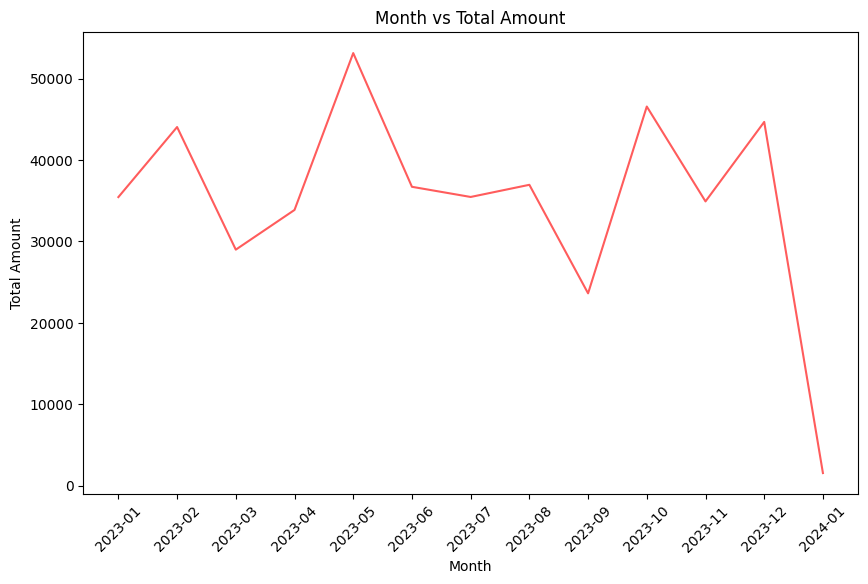

In [34]:
#lineplot of total amount in each month wise

# Ensure 'Month' column exists
if 'Month' not in df.columns:
	df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

# Aggregate total amount by month
monthly_total = df.groupby('Month')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Total Amount', data=monthly_total, color='red', alpha=0.64)
plt.title('Month vs Total Amount')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [35]:
#gender v/s total amount
plt.figure(figsize=(10,6))
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)>

<Figure size 1000x600 with 0 Axes>

   Gender  Total Amount
0  Female        232840
1    Male        223160


/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_1630/2806692699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total Amount', data=gender_total, palette='pastel')


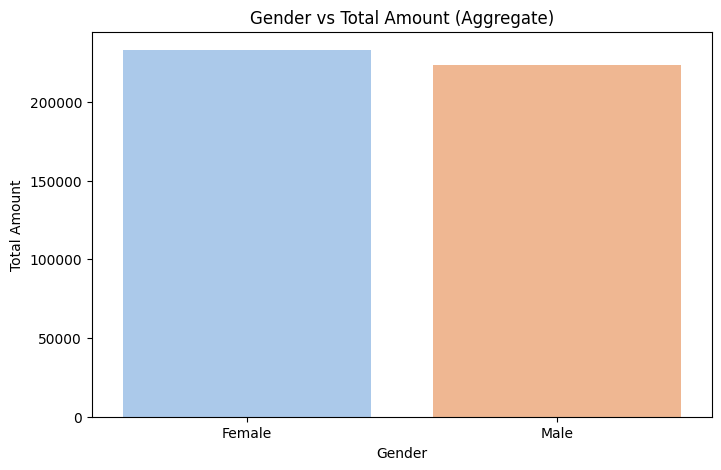

In [36]:
# Aggregate total amount by gender
gender_total = df.groupby('Gender')['Total Amount'].sum().reset_index()
print(gender_total)
plt.figure(figsize=(8,5))
sns.barplot(x='Gender', y='Total Amount', data=gender_total, palette='pastel')
plt.title('Gender vs Total Amount (Aggregate)')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

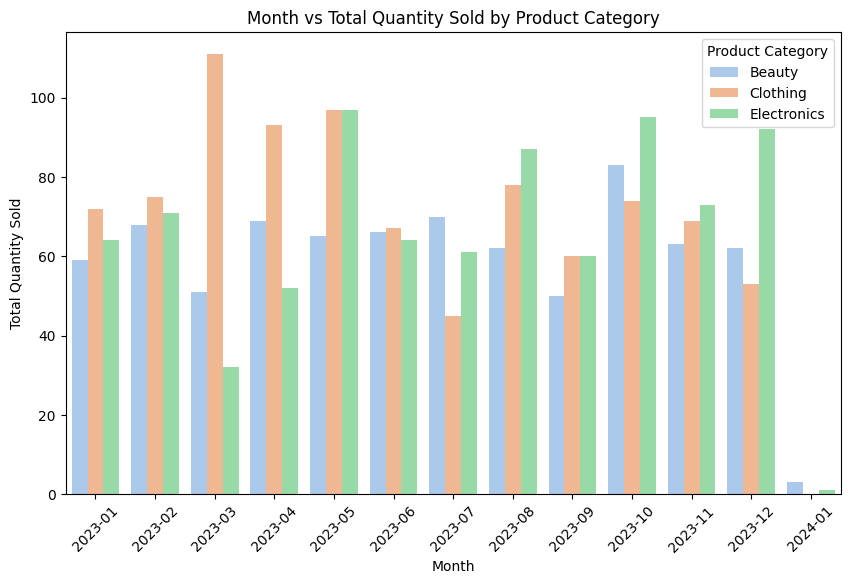

In [37]:
# month v/s total quantity sold of each product category

plt.figure(figsize=(10,6))
# Ensure 'Month' column exists  
if 'Month' not in df.columns:
    df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
# Aggregate total quantity by month and product category
monthly_quantity = df.groupby(['Month', 'Product Category'])['Quantity'].sum().reset_index()
sns.barplot(x='Month', y='Quantity', hue='Product Category', data=monthly_quantity, palette='pastel')
plt.title('Month vs Total Quantity Sold by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()


In [ ]:
# 1. Distribution of Age by Gender and Product Category
plt.figure(figsize=(12,6))
sns.boxplot(x='Product Category', y='Age', hue='Gender', data=df)
plt.title('Age Distribution by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()


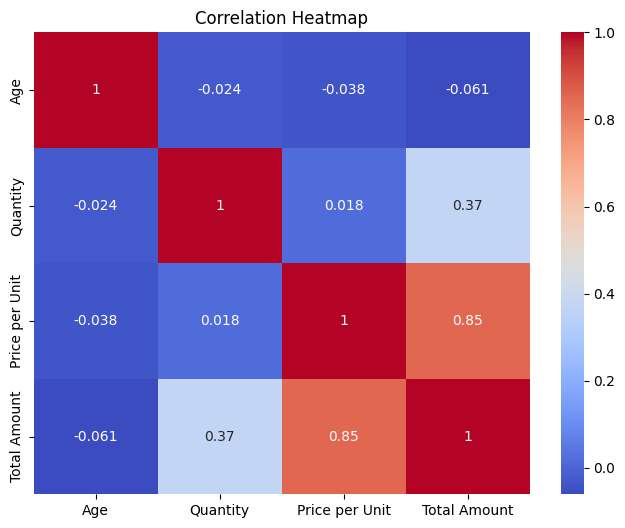

In [38]:

# 2. Correlation Heatmap for Numeric Features
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_1630/2412049132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')


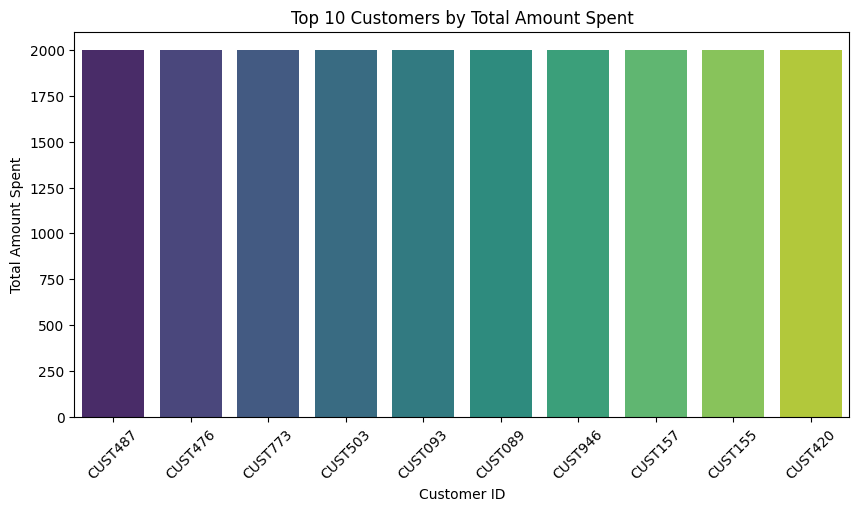

In [39]:
# 3. Top 10 Customers by Total Amount Spent
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.title('Top 10 Customers by Total Amount Spent')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()


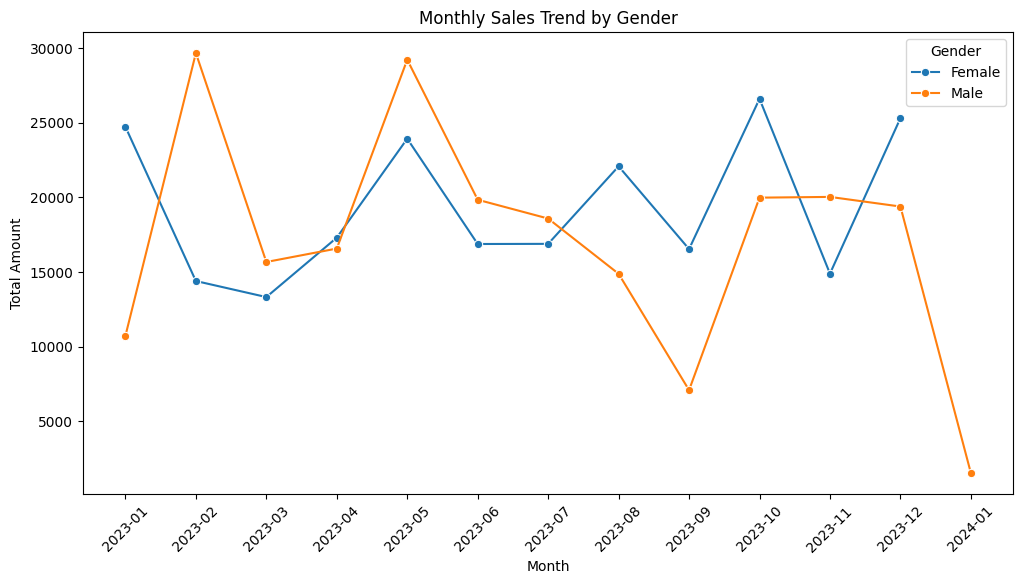

In [40]:

# 4. Monthly Sales Trend by Gender
monthly_gender = df.groupby(['Month', 'Gender'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total Amount', hue='Gender', data=monthly_gender, marker='o')
plt.title('Monthly Sales Trend by Gender')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

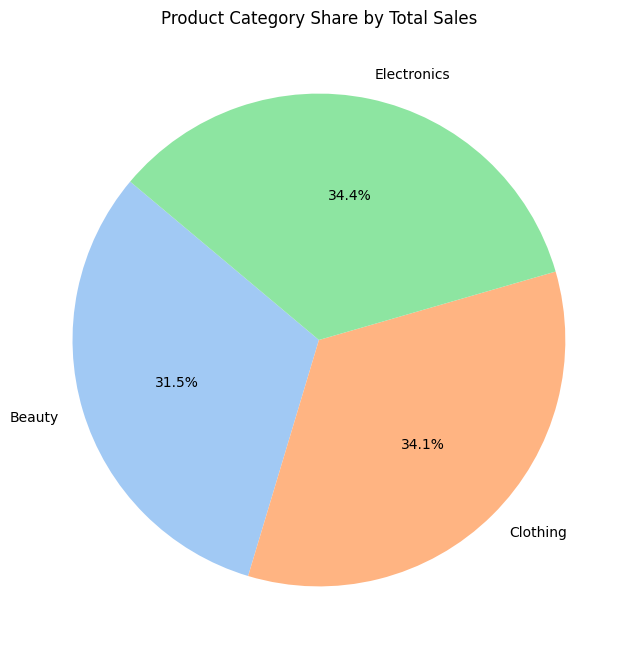

In [41]:


# 5. Product Category Share (Pie Chart)
category_share = df.groupby('Product Category')['Total Amount'].sum()
plt.figure(figsize=(8,8))
plt.pie(category_share, labels=category_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Product Category Share by Total Sales')
plt.show()



/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_1630/2261704369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=avg_order_value, palette='Set2')


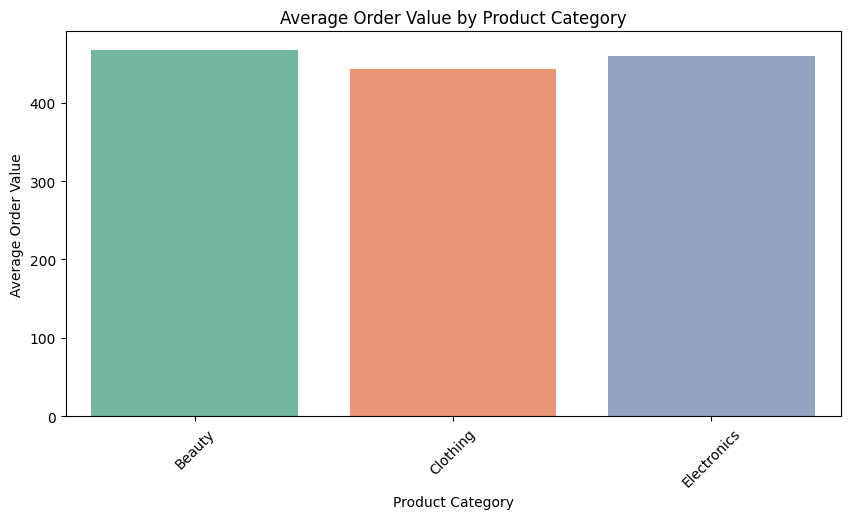

In [42]:
# 6. Average Order Value by Product Category
avg_order_value = df.groupby('Product Category')['Total Amount'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Product Category', y='Total Amount', data=avg_order_value, palette='Set2')
plt.title('Average Order Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()